In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import PIL.Image as Image
import os 
import pathlib 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/jaikr/.keras/datasets/flower_photos')

In [3]:
path = r"C:/Users/jaikr/.keras/datasets/flower_photos"
path

'C:/Users/jaikr/.keras/datasets/flower_photos'

In [5]:
data_dir = pathlib.Path(path)
data_dir

WindowsPath('C:/Users/jaikr/.keras/datasets/flower_photos')

In [4]:
for i in data_dir.iterdir():
    print(i)

C:\Users\jaikr\.keras\datasets\flower_photos\daisy
C:\Users\jaikr\.keras\datasets\flower_photos\dandelion
C:\Users\jaikr\.keras\datasets\flower_photos\flower_photos
C:\Users\jaikr\.keras\datasets\flower_photos\LICENSE.txt
C:\Users\jaikr\.keras\datasets\flower_photos\roses
C:\Users\jaikr\.keras\datasets\flower_photos\sunflowers
C:\Users\jaikr\.keras\datasets\flower_photos\tulips


In [6]:
##preparing dataset 
flower_dict = {
    "roses" : list(data_dir.glob("roses/*")),
    "daisy" : list(data_dir.glob("daisy/*")),
    "dandelion" : list(data_dir.glob("dandelion/*")),
    "sunflowers" : list(data_dir.glob("sunflowers/*")),
    "tulips" : list(data_dir.glob("tulips/*")),
}

In [8]:
##label encoding 
flowers_label = {
    "roses" : 0,
    "daisy" : 1,
    "dandelion" : 2,
    "sunflowers" : 3,
    "tulips" : 4
}

In [9]:
flower_dict["sunflowers"][0]

WindowsPath('C:/Users/jaikr/.keras/datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg')

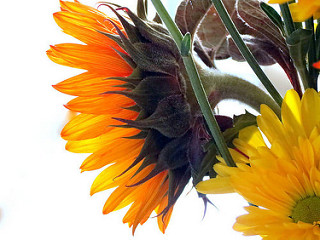

In [11]:
Image.open(flower_dict["sunflowers"][100])